# 1.Portfolio problematik


##1.1 Placering og forskydning

### 1.1.1 Angiv udvælgelseskriterier

**Trin 1**

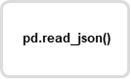

Vi henter json filen ved av

```
data=pd.read_json()
```

In [1]:
#@title importere json fil
import pandas as pd
data=pd.read_json("https://platform-rest-prod.ngdata.no/api/FindStore/StoresClosestToMe/1300/?latitude=65.4&longitude=16.8&minnumberofstores=200&maxNumberOfStores=300&maxDistance=2470554")

### 1.1.2 Vælg tabeller / filer af interesse

**Trin 2**

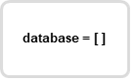


Vi initialisere en list såledelse.

```
database=[]
```



In [2]:
#@title initialisering av liste
database=[]

**Trin 3**

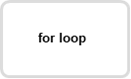


Vi starter en for-løkke, såledelse

```
for i, store in enumerate(data.store):
```

**Trin 4**


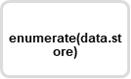

Her tæller vi igjennem indeks (i) og verdier (store) i data.store


```
enumerate(data.store)
```

**Trin 5**

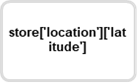

Vi gemmer verdier fra latitude og longitude fra ordboken store['location']

 
 ```
store['latitude']=store['location']['latitude']
store['longitude']=store['location']['longitude']
```
**Trin 6**

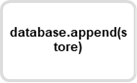

Og til sist, legger listen til den eksisterene liste

```
database.append(store)
```



In [3]:
#@title for-løkke av latitude og longitude
for i, store in enumerate(data.store):
  #print(i)
  store['latitude']=store['location']['latitude']
  store['longitude']=store['location']['longitude']
  database.append(store)

**Trin 7**

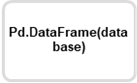

Nå kan vi lage en dataramme


```
database=pd.DataFrame(database)
```



In [4]:
#@title oprettelse af datarame
database=pd.DataFrame(database)
database.head(3)

,id,chainid,name,link,description,location,zipcode,zipcitycode,municipalitid,countyid,regionname,services,visitaddress,phone,fax,email,openinghours,istrumfactivated,loc,municipality,county,suggestion,latitude,longitude
0,7080000543441,1300,MENY Manglerud,,,"{'latitude': 59.8972801147, 'longitude': 10.81...",0679,OSLO,301,3,ØST,"TRUMFBONUS, TIPPING",Manglerud Senter Plogveien6,22 75 77 00,22 75 77 01,butikksjef.manglerud@meny.no,"{'days': [{'date': None, 'label': 'Hverdager',...",True,"{'lon': 10.8128584217, 'lat': 59.8972801147}",OSLO,OSLO,"[OSLO, OSLO, MENY Manglerud, 0679, Manglerud]",59.897280,10.812858
1,7080001096458,1300,Helgø MENY Stadionparken,,,"{'latitude': 58.9149129492, 'longitude': 5.729...",4020,STAVANGER,1103,11,ROGALAND,"TRUMFBONUS, TIPPING",Jåttåvågveien 7,52 87 05 00,52870505,butikksjef.stadionparken@helgomeny.no,"{'days': [{'date': None, 'label': 'Hverdager',...",True,"{'lon': 5.7293505075999995, 'lat': 58.9149129492}",STAVANGER,ROGALAND,"[STAVANGER, ROGALAND, Helgø MENY Stadionparken...",58.914913,5.729351
2,7080000027293,1300,MENY Aksdal,,,"{'latitude': 59.4220157939, 'longitude': 5.444...",5575,AKSDAL,1146,11,ROGALAND,"PIB, TRUMFBONUS, TIPPING",Aksdal senter,52 75 49 49,52 75 49 69,butikksjef.aksdal@meny.no,"{'days': [{'date': None, 'label': 'Hverdager',...",True,"{'lon': 5.4444173803, 'lat': 59.4220157939}",TYSVÆR,ROGALAND,"[TYSVÆR, ROGALAND, MENY Aksdal, 5575, Aksdal]",59.422016,5.444417


### 1.1.3 Vælg data i en tabel / fil


Til sist viser vi data, som et kort

In [7]:
#@title kort
import altair as alt

countries = alt.topo_feature('https://dmws.hkvservices.nl/dataportal/data.asmx/read?database=vega&key=europe', 'europe') 

norway =alt .  Chart ( countries ) .  mark_geoshape (    fill='lightgray',
    stroke='white').encode(
)

butikker = alt.Chart(database).mark_circle(
color="black"
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color=alt.value('black'),
    tooltip=['name:N','regionname:N','municipality:N','county:N','latitude:Q','longitude:Q'],
)


(norway+butikker).project( #projektere visning background+
    type= 'mercator', #vælg projektering
    scale= 1000, #skalere visning
    center= [12,65],  #centere visning på følgende gps koordinate
) .  properties (
     width = 600 ,
     height = 600
).properties(title="Meny butikker") #.save('Meny.html')


alt.LayerChart(...)